# Módulo 24 - Combinação de Modelos II

## Exercício 1

Luciana Gonzaga

---

# AdaBoost

---

### 1) Diferenças entre RandomForest e AdaBoost:

São dois algoritmos populares de aprendizado de máquina que pertencem à categoria de ensemble learning, onde múltiplos modelos são combinados para melhorar o desempenho. Aqui estão as principais diferenças entre eles:

1. **Tipo de ensemble:**

    - O RandomForest é um ensemble de bagging, onde várias árvores de decisão são construídas a partir de subconjuntos aleatórios do conjunto de dados e suas previsões são combinadas por votação ou média.
    - O AdaBoost é um ensemble de boosting, onde os modelos são construídos sequencialmente, dando mais peso às amostras mal classificadas em cada iteração (weak learners)


2. **Modelo base:**

    - O modelo base usado no RandomForest é a árvore de decisão completa.
    - O AdaBoost pode usar qualquer modelo base, mas as árvores de decisão simples, ou stumps (com 1 de profundidade e 2 folhas), são comumente usadas.


3. **Peso das amostras:**

    - Todas as amostras têm o mesmo peso na construção de cada árvore do RandomForest.
    - O AdaBoost atribui pesos diferentes às amostras, dando mais peso às amostras mal classificadas nas iterações subsequentes.


4. **Abordagem para reduzir o overfitting:**

    - O RandomForest reduz o overfitting construindo árvores profundas e combinando muitas delas, o que ajuda a reduzir o viés e a variância.
    - O AdaBoost reduz o overfitting ajustando o foco nas amostras mal classificadas e construindo modelos mais simples a partir delas.


5. **Sensibilidade a outliers:**

    - O RandomForest é menos sensível a outliers, uma vez que a média ou votação das previsões de várias árvores ajuda a mitigar o impacto de outliers.
    - O AdaBoost é mais sensível a outliers, pois dá mais peso às amostras mal classificadas, incluindo possíveis outliers.

---

### 2) Exemplo de uso:

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

#### *AdaBoost de classificação:*

In [4]:
X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

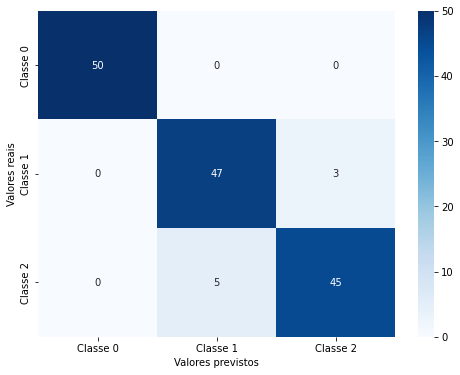

In [6]:
# Matriz de confusão:

y_pred = cross_val_predict(clf, X, y, cv=5)

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.show()

#### *AdaBoost de regressão:*

In [8]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)
regr.predict([[0, 0, 0, 0]])
regr.score(X, y)

0.9771376939813695

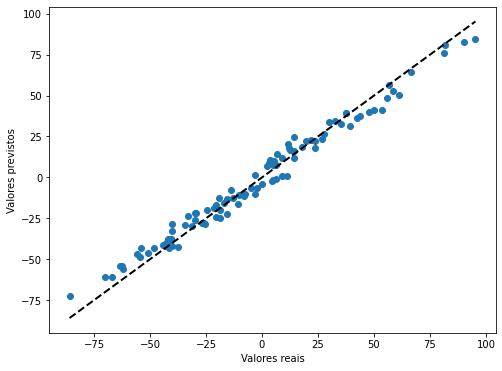

In [11]:
y_pred = regr.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()

---

### 3) Hiperparâmetros:

Aqui estão cinco hiperparâmetros importantes do AdaBoost:

- **n_estimators:** Determina o número de estimadores (modelos base) a serem criados no processo de boosting. Um valor maior para n_estimators geralmente leva a um modelo mais poderoso, mas também pode aumentar o risco de overfitting.


- **learning_rate:** Controla a contribuição de cada estimador para a atualização dos pesos das amostras. Um valor menor de learning_rate faz com que os estimadores contribuam menos, o que pode ajudar a regularizar o modelo. No entanto, diminuir o learning_rate pode exigir um aumento correspondente em n_estimators para manter o desempenho.


- **estimator:** É o modelo base usado em cada iteração do AdaBoost. Normalmente, é uma árvore de decisão simples (por padrão), mas você pode escolher um modelo base diferente, como uma regressão linear ou uma árvore mais complexa, dependendo do problema.


- **algorithm:** Permite escolher o algoritmo de boosting a ser usado. Existem duas opções principais: 'SAMME' (Stagewise Additive Modeling using a Multi-class Exponential loss function) e 'SAMME.R' (SAMME com reescala). 'SAMME.R' é geralmente recomendado, pois tende a ser mais robusto e funciona bem para problemas multiclasse.


- **random_state:** Controla a semente usada para a geração de números aleatórios no AdaBoost. Definir um valor específico para random_state torna os resultados reproduzíveis, o que é útil para fins de depuração e comparação de diferentes configurações.

---

### 4) GridSearch:

In [12]:
from sklearn.model_selection import GridSearchCV

In [29]:
X, y = load_iris(return_X_y=True)

ab = AdaBoostClassifier()

parametros = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid = GridSearchCV(estimator=ab,
                    param_grid=parametros,
                    scoring='accuracy',
                    verbose=2,
                    cv=5)

grid.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=300; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_est

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [30]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 300}

In [32]:
best_ab = AdaBoostClassifier(learning_rate= 0.05, n_estimators=300)
scores = cross_val_score(best_ab, X, y, cv=5)
scores.mean()

0.9466666666666667